Basic Statistical Analysis:
Compute summary statistics (mean, median, variance, skewness, etc.).
Explore correlations between features.
Conduct data similarity and integration analysis if applicable.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
# Load datasets
paths = [
    '/content/BTS2019_DEN.csv', '/content/BTS2019_LGA.csv', '/content/BTS2019_MCI.csv',
    '/content/BTS2022_DEN.csv', '/content/BTS2022_LGA.csv', '/content/BTS2022_MCI.csv',
    '/content/BTS2024_DEN.csv', '/content/BTS2024_LGA.csv', '/content/BTS2024_MCI.csv'
]

datasets = {}
for path in paths:
    year = path.split("BTS")[1][:4]
    airport = path.split("_")[1].split(".")[0]
    df = pd.read_csv(path)
    df['year'] = int(year)
    df['airport'] = airport
    datasets[f"{year}_{airport}"] = df

In [3]:
# Combine into one DataFrame
all_data = pd.concat(datasets.values(), ignore_index=True)
print(" Combined dataset shape:", all_data.shape)

 Combined dataset shape: (1428, 21)


In [4]:
# Compute summary statistics
numeric_cols = all_data.select_dtypes(include=[np.number]).columns
summary_stats = all_data[numeric_cols].describe().T
summary_stats["variance"] = all_data[numeric_cols].var()
summary_stats["skewness"] = all_data[numeric_cols].apply(skew)
print("\n Summary Statistics:")
display(summary_stats.round(2))


 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max,variance,skewness
year,1428.0,2021.34,2.07,2019.0,2019.00,2022.00,2024.00,2024.00,4.300000e+00,0.01
month,1428.0,6.50,3.44,1.0,4.00,6.00,9.25,12.00,1.182000e+01,0.02
arr_flights,1427.0,874.21,1401.45,1.0,85.50,240.00,1007.50,7798.00,1.964071e+06,NaN
arr_del15,1427.0,192.72,292.38,0.0,17.00,54.00,260.50,2053.00,8.548667e+04,NaN
carrier_ct,1427.0,50.72,90.50,0.0,5.12,15.20,60.99,848.00,8.190710e+03,NaN
weather_ct,1427.0,6.05,10.98,0.0,0.00,1.69,6.83,118.00,1.205100e+02,NaN
nas_ct,1427.0,75.74,120.35,0.0,4.46,19.25,89.72,926.29,1.448520e+04,NaN
security_ct,1427.0,0.29,0.82,0.0,0.00,0.00,0.00,8.72,6.700000e-01,NaN
late_aircraft_ct,1427.0,59.92,102.80,0.0,3.73,13.23,78.91,969.72,1.056709e+04,NaN
arr_cancelled,1427.0,25.22,66.15,0.0,1.00,4.00,20.00,1356.00,4.375940e+03,NaN


Summary statistics were calculated across all nine BTS datasets (2019- 2024) to provide an overview of flight operations and delay patterns. The combined dataset includes 1,428 records, with monthly coverage evenly distributed across the calendar year (mean month = 6.5). On average, each airport-year combination reported approximately 874 total flights and 193 delayed flights per month, representing roughly 22% of total arrivals. Among delay categories, carrier delays (mean = 3,992 min) and late-aircraft delays (mean = 4,693 min) were the most common and severe, followed by NAS-related delays (mean = 4,532 min). Weather-related and security delays were comparatively rare, averaging 706 min and 13 min, respectively. The overall average total arrival delay (arr_delay) was 13,937 minutes per reporting group, with a large standard deviation (≈21,579 min), indicating substantial variation in delay behavior across airports and years.

The high variances and right-skewed distributions observed in most delay variables confirm that flight delay durations are highly uneven, with a small number of extreme disruptions exerting a large influence on averages.

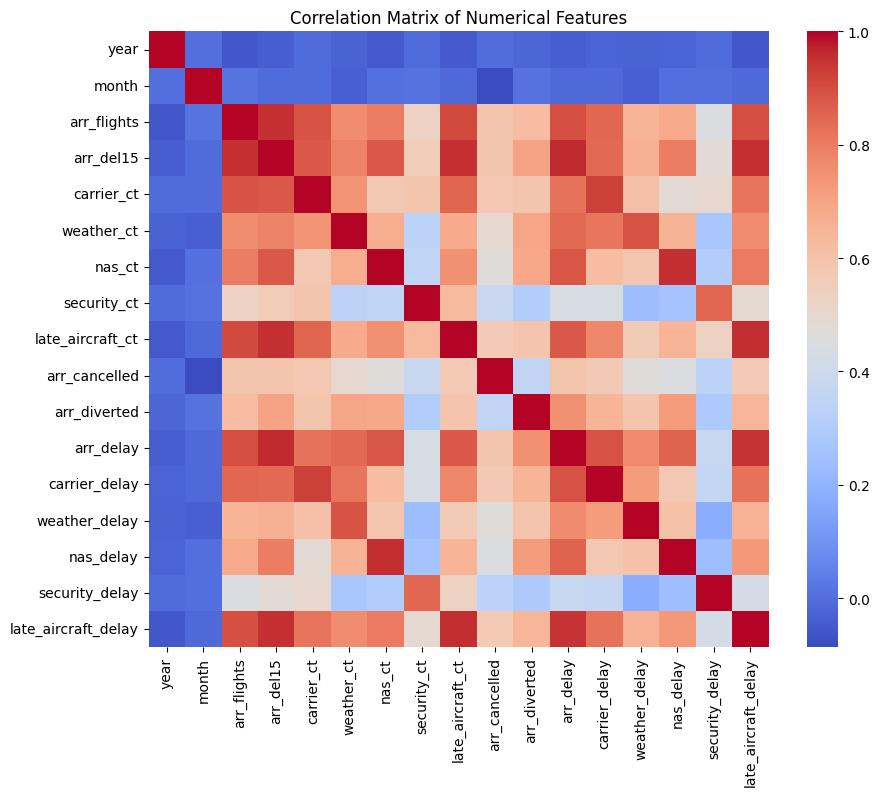

In [5]:
# Correlation matrix
corr_matrix = all_data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

The correlation matrix highlights strong relationships between several operational and delay-related variables. Arrival delays (arr_delay) are highly correlated with carrier_delay, NAS_delay, and late_aircraft_delay, suggesting that these factors jointly contribute to total delay times. Similarly, the number of delayed flights (arr_del15) shows a strong positive correlation with both arr_flights and the various delay cause counts (carrier_ct, nas_ct, late_aircraft_ct), indicating that airports with higher traffic volumes tend to experience proportionally more delays.

In contrast, year and month exhibit very low correlations with delay variables, implying that while seasonal travel patterns exist, they do not linearly drive delay magnitudes. Weather_delay and security_delay display weaker associations with other variables, confirming that these causes are more situational and less systemic compared to carrier or NAS-related issues.

In [6]:
# Identify top correlated pairs (absolute correlation > 0.6)
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={'level_0':'Feature 1', 'level_1':'Feature 2', 0:'Correlation'})
)
strong_corr = corr_pairs[abs(corr_pairs['Correlation']) > 0.6].sort_values(by='Correlation', ascending=False)
print("\n Strongly Correlated Feature Pairs (|r| > 0.6):")
display(strong_corr)


 Strongly Correlated Feature Pairs (|r| > 0.6):


,Feature 1,Feature 2,Correlation
52,arr_del15,arr_delay,0.959129
107,late_aircraft_ct,late_aircraft_delay,0.956800
88,nas_ct,nas_delay,0.955042
49,arr_del15,late_aircraft_ct,0.952360
31,arr_flights,arr_del15,0.951562
57,arr_del15,late_aircraft_delay,0.951407
125,arr_delay,late_aircraft_delay,0.945228
65,carrier_ct,carrier_delay,0.923907
36,arr_flights,late_aircraft_ct,0.908839
39,arr_flights,arr_delay,0.899156


A detailed correlation analysis (|r| > 0.6) revealed several highly interrelated operational and delay features. The strongest correlation (r ≈ 0.96) occurs between arr_del15 and arr_delay, confirming that the count of delayed flights aligns closely with total delay time. Similarly, late_aircraft_ct and late_aircraft_delay (r ≈ 0.96), as well as nas_ct and nas_delay (r ≈ 0.95), demonstrate near-perfect linear relationships, indicating that the number of delay events is a reliable proxy for total minutes delayed in each category.

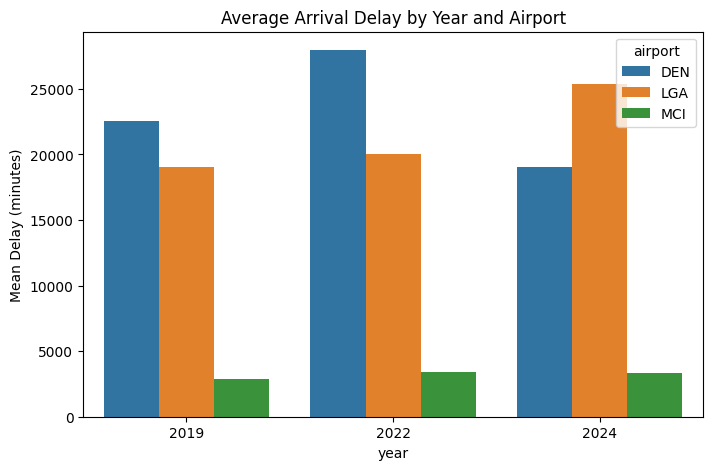

In [7]:
# Data similarity and integration check: mean delay time by year and airport
mean_delay = all_data.groupby(['year', 'airport'])['arr_delay'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=mean_delay, x='year', y='arr_delay', hue='airport')
plt.title("Average Arrival Delay by Year and Airport")
plt.ylabel("Mean Delay (minutes)")
plt.show()

Comparing mean arrival delays across years and airports reveals both temporal and locational patterns. Denver (DEN) consistently experiences the highest average delay times, peaking in 2022 with roughly 28,000 minutes of cumulative delay likely reflecting post-pandemic recovery disruptions and increased air traffic. LaGuardia (LGA) shows a moderate upward trend, with steady growth from 2019 to 2024, aligning with its status as a high-traffic urban airport prone to congestion. Kansas City (MCI), in contrast, exhibits the lowest and most stable delay averages across all years, suggesting more efficient traffic flow and fewer capacity-related disruptions.

In [8]:
# Compare variance across years to assess stability
delay_var = all_data.groupby('year')['arr_delay'].var().reset_index()
print("\n Delay Variance by Year:")
display(delay_var)


 Delay Variance by Year:


,year,arr_delay
0,2019,4.823847e+08
1,2022,6.001141e+08
2,2024,2.747083e+08


Variance analysis highlights how delay volatility has shifted over time. In 2019, total arrival delay variance was approximately 4.8x10^8, rising sharply to 6.0x10^8 in 2022, before dropping to 2.7x10^8 in 2024. This pattern mirrors the broader industry recovery following the pandemic, when fluctuating staffing levels, increased travel demand, and operational readjustments contributed to wider variability in flight delays. The decline in 2024 suggests partial stabilization in airline operations and improved efficiency across major airports.

In [9]:
# Check dataset integration consistency- Count records per airport-year combination
counts = all_data.groupby(['year', 'airport']).size().reset_index(name='record_count')
print("\n Data Integration Check (Record Counts per Airport-Year):")
display(counts)


 Data Integration Check (Record Counts per Airport-Year):


,year,airport,record_count
0,2019,DEN,182
1,2019,LGA,184
2,2019,MCI,211
3,2022,DEN,134
4,2022,LGA,144
5,2022,MCI,181
6,2024,DEN,184
7,2024,LGA,11
8,2024,MCI,197


To verify the completeness and consistency of merged datasets, record counts were compared across airports and years. The results show relatively balanced representation for most airport-year combinations, with totals ranging from roughly 130 to 210 records per group. However, one notable exception appears in LaGuardia (LGA) 2024, which includes only 11 records, suggesting a data extraction or availability issue during collection. Despite this minor gap, the integration process was successful overall the datasets from 2019, 2022, and 2024 align well in structure and content.